In [16]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [11]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

kalmunai lk
kedrovyy ru
new norfolk au
umzimvubu za
arraial do cabo br
ucluelet ca
mataura pf
chadiza zm
hamilton bm
ponta do sol cv
bolshiye uki ru
sechura pe
mataura pf
nabire id
tasiilaq gl
lebu cl
taolanaro mg
dashitou cn
san policarpo ph
tura ru
saint george bm
olafsvik is
hilo us
seoul kr
tuktoyaktuk ca
bollnas se
quatre cocos mu
kudahuvadhoo mv
laguna br
albany au
black river jm
saint-michel-des-saints ca
galle lk
kahului us
flinders au
aksehir tr
ushuaia ar
half moon bay us
ushuaia ar
jacksonville us
punta arenas cl
qaanaaq gl
busselton au
tiznit ma
avarua ck
zarichne ua
narsaq gl
busselton au
varhaug no
yellowknife ca
hualmay pe
hermanus za
ust-kamchatsk ru
puerto ayora ec
hermanus za
illoqqortoormiut gl
port alfred za
adrar dz
codrington ag
illoqqortoormiut gl
meyungs pw
rikitea pf
jamestown sh
tahta eg
vung tau vn
yeppoon au
hermanus za
winsum nl
puerto ayora ec
ushuaia ar
ushuaia ar
pisco pe
olafsvik is
ushuaia ar
georgetown sh
mataura pf
kapaa us
rikitea pf
hasaki jp
hilo 

ushuaia ar
ushuaia ar
punta arenas cl
mataura pf
ushuaia ar
sibiti cg
fortuna us
sentyabrskiy ru
ushuaia ar
rungata ki
ribeira grande pt
nelson bay au
birao cf
kapaa us
kavieng pg
lebu cl
chisinau md
kulhudhuffushi mv
dikson ru
pilisszentivan hu
amderma ru
qaanaaq gl
ushuaia ar
xining cn
busselton au
bambanglipuro id
ushuaia ar
butaritari ki
galiwinku au
illoqqortoormiut gl
ucluelet ca
agadez ne
albany au
yeniseysk ru
mataura pf
nanortalik gl
mar del plata ar
georgetown sh
boa vista br
saint anthony ca
comodoro rivadavia ar
khatanga ru
shingu jp
ixtapa mx
saint-philippe re
dubovyy umet ru
klaksvik fo
mataura pf
pacific grove us
portland au
nome us
punta arenas cl
ushuaia ar
barrow us
qostanay kz
podyuga ru
faanui pf
albenga it
bethel us
port alfred za
nizhneyansk ru
tsihombe mg
yellowknife ca
arraial do cabo br
bambous virieux mu
temaraia ki
warangal in
mataura pf
busselton au
luganville vu
bluff nz
lagoa pt
progreso mx
rikitea pf
illoqqortoormiut gl
barentsburg sj
castro cl
ijaki ki
d

chuy uy
fairbanks us
vaitupu wf
albany au
rikitea pf
kaitangata nz
bluff nz
yeppoon au
ribeira grande pt
karratha au
ushuaia ar
rikitea pf
enshi cn
ushuaia ar
vila velha br
rovaniemi fi
turayf sa
cape town za
azacualpa hn
santa rosalia mx
jamestown sh
namibe ao
kuche cn
atuona pf
saldanha za
samusu ws
qaanaaq gl
kodiak us
mataura pf
boende cd
albany au
havelock ca
komsomolskiy ru
vaitupu wf
cape town za
villa florida py
castro cl
hvide sande dk
itoman jp
lebu cl
katsuura jp
meulaboh id
kubachi ru
taolanaro mg
fushan cn
byron bay au
aklavik ca
kaitangata nz
georgetown sh
rikitea pf
sechura pe
arraial do cabo br
yar-sale ru
bredasdorp za
port alfred za
saskylakh ru
lubaczow pl
marawi sd
baracoa cu
chuy uy
ushuaia ar


In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [15]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a8bd4cd659722226d297e54e350616cb


In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [18]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [25]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 13 of Set 25 | kalmunai
Processing Record 14 of Set 25 | kedrovyy
Processing Record 15 of Set 25 | new norfolk
Processing Record 16 of Set 25 | umzimvubu
City not found. Skipping...
Processing Record 17 of Set 25 | arraial do cabo
Processing Record 18 of Set 25 | ucluelet
Processing Record 19 of Set 25 | mataura
Processing Record 20 of Set 25 | chadiza
Processing Record 21 of Set 25 | hamilton
Processing Record 22 of Set 25 | ponta do sol
Processing Record 23 of Set 25 | bolshiye uki
City not found. Skipping...
Processing Record 24 of Set 25 | sechura
Processing Record 25 of Set 25 | nabire
Processing Record 26 of Set 25 | tasiilaq
Processing Record 27 of Set 25 | lebu
Processing Record 28 of Set 25 | taolanaro
City not found. Skipping...
Processing Record 29 of Set 25 | dashitou
Processing Record 30 of Set 25 | san policarpo
Processing Record 31 of Set 25 | tura
Processing Record 32 of Set 25 | saint george
Processing Record 33 of Set 25 | olafsvik
Processing Record 

Processing Record 40 of Set 28 | luganville
Processing Record 41 of Set 28 | zeya
Processing Record 42 of Set 28 | namatanai
Processing Record 43 of Set 28 | nguiu
City not found. Skipping...
Processing Record 44 of Set 28 | cairns
Processing Record 45 of Set 28 | dekoa
City not found. Skipping...
Processing Record 46 of Set 28 | bambanglipuro
Processing Record 47 of Set 28 | sentyabrskiy
City not found. Skipping...
Processing Record 48 of Set 28 | sisophon
Processing Record 49 of Set 28 | bang saphan
Processing Record 50 of Set 28 | haines junction
Processing Record 1 of Set 29 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 29 | pemba
Processing Record 3 of Set 29 | camacha
Processing Record 4 of Set 29 | bathsheba
Processing Record 5 of Set 29 | lolua
City not found. Skipping...
Processing Record 6 of Set 29 | karamea
City not found. Skipping...
Processing Record 7 of Set 29 | povenets
Processing Record 8 of Set 29 | atakpame
Processing Record 9 of Set 29 | mitu

Processing Record 21 of Set 32 | kavieng
Processing Record 22 of Set 32 | chisinau
Processing Record 23 of Set 32 | kulhudhuffushi
Processing Record 24 of Set 32 | pilisszentivan
Processing Record 25 of Set 32 | galiwinku
City not found. Skipping...
Processing Record 26 of Set 32 | agadez
Processing Record 27 of Set 32 | yeniseysk
Processing Record 28 of Set 32 | nanortalik
Processing Record 29 of Set 32 | boa vista
Processing Record 30 of Set 32 | comodoro rivadavia
Processing Record 31 of Set 32 | shingu
Processing Record 32 of Set 32 | ixtapa
Processing Record 33 of Set 32 | dubovyy umet
Processing Record 34 of Set 32 | nome
Processing Record 35 of Set 32 | qostanay
Processing Record 36 of Set 32 | podyuga
Processing Record 37 of Set 32 | faanui
Processing Record 38 of Set 32 | albenga
Processing Record 39 of Set 32 | temaraia
City not found. Skipping...
Processing Record 40 of Set 32 | warangal
Processing Record 41 of Set 32 | ijaki
City not found. Skipping...
Processing Record 42 

Processing Record 9 of Set 36 | elmira
Processing Record 10 of Set 36 | harare
Processing Record 11 of Set 36 | namibe
Processing Record 12 of Set 36 | coquimbo
Processing Record 13 of Set 36 | bonnyville
Processing Record 14 of Set 36 | nahariyya
Processing Record 15 of Set 36 | freeport
Processing Record 16 of Set 36 | camacupa
Processing Record 17 of Set 36 | cranbrook
Processing Record 18 of Set 36 | kentville
Processing Record 19 of Set 36 | vila franca do campo
Processing Record 20 of Set 36 | hohhot
Processing Record 21 of Set 36 | olden
Processing Record 22 of Set 36 | abnub
Processing Record 23 of Set 36 | sam chuk
Processing Record 24 of Set 36 | opuwo
Processing Record 25 of Set 36 | solton
Processing Record 26 of Set 36 | muroto
Processing Record 27 of Set 36 | crotone
Processing Record 28 of Set 36 | manakara
Processing Record 29 of Set 36 | chikoy
City not found. Skipping...
Processing Record 30 of Set 36 | gizo
Processing Record 31 of Set 36 | parainen
Processing Record 

In [27]:
len(city_data)

561

In [28]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Baracoa,20.35,-74.50,78.06,74,100,10.27,CU,2020-12-02 20:41:41
1,Baracoa,20.35,-74.50,78.06,74,100,10.27,CU,2020-12-02 20:41:41
2,Kalmunai,7.42,81.82,77.49,87,100,5.86,LK,2020-12-02 20:52:05
3,Kedrovyy,56.17,91.82,3.20,84,36,4.12,RU,2020-12-02 20:52:05
4,New Norfolk,-42.78,147.06,54.00,66,100,4.12,AU,2020-12-02 20:52:05
5,Arraial Do Cabo,-22.97,-42.03,78.80,83,75,6.93,BR,2020-12-02 20:52:05
6,Ucluelet,48.93,-125.55,50.00,75,5,4.70,CA,2020-12-02 20:47:39
7,Mataura,-46.19,168.86,53.01,73,97,13.00,NZ,2020-12-02 20:52:05
8,Chadiza,-14.07,32.44,71.74,79,100,2.13,ZM,2020-12-02 20:52:06
9,Hamilton,39.18,-84.53,42.80,56,1,4.70,US,2020-12-02 20:52:06


In [30]:
# reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
# new_column_order = ["column2", "column4", "column1"]
# df = df[new_column_order]

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Baracoa,CU,2020-12-02 20:41:41,20.35,-74.50,78.06,74,100,10.27
1,Baracoa,CU,2020-12-02 20:41:41,20.35,-74.50,78.06,74,100,10.27
2,Kalmunai,LK,2020-12-02 20:52:05,7.42,81.82,77.49,87,100,5.86
3,Kedrovyy,RU,2020-12-02 20:52:05,56.17,91.82,3.20,84,36,4.12
4,New Norfolk,AU,2020-12-02 20:52:05,-42.78,147.06,54.00,66,100,4.12
...,...,...,...,...,...,...,...,...,...
556,Kubachi,RU,2020-12-02 20:53:19,42.09,47.60,29.66,94,37,2.13
557,Fushan,CN,2020-12-02 20:53:20,37.50,121.26,36.41,81,98,5.14
558,Byron Bay,AU,2020-12-02 20:53:20,-28.65,153.62,71.60,88,90,6.93
559,Lubaczow,PL,2020-12-02 20:53:20,50.16,23.12,28.99,90,0,8.21


In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

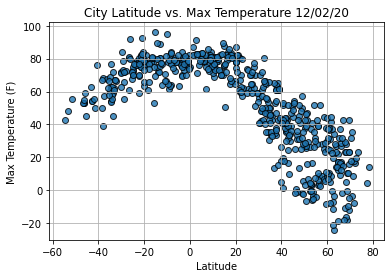

In [35]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

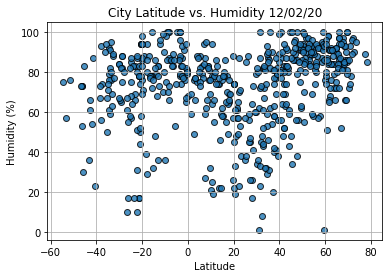

In [36]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

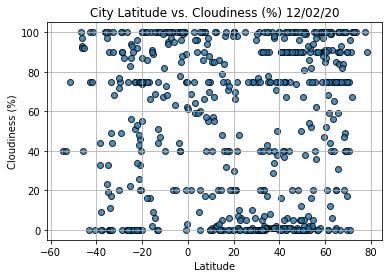

In [37]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

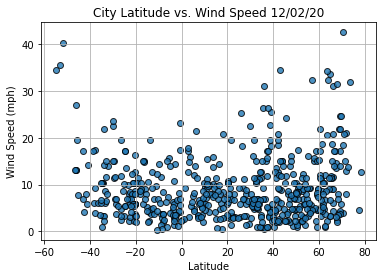

In [38]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()